In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('carsv3.csv')
dataset = dataset.drop(columns=['Images','Car Model'])
dataset

,Ask Price,Brand,Depreciation,Registration Date,Category,Mileage,Engine Capacity
0,59000,Audi,11870,12-Jun-2015,Hatchback,43500,1390
1,27800,Audi,11010,26-Feb-2009,Luxury,166000,1798
2,94800,Audi,10870,18-Mar-2019,Luxury,35000,999
3,99800,Audi,14740,28-Nov-2016,SUV,92999,1984
4,74800,Audi,10700,13-Aug-2008,Sports,147000,1984
...,...,...,...,...,...,...,...
4895,72800,Opel,8970,11-Jun-2018,Stationwagon,59188,999
4896,19000,Opel,5420,17-Feb-2010,Van,38570,1686
4897,49800,Opel,8570,06-Jun-2016,Hatchback,118000,1364
4898,69800,Opel,8940,08-Mar-2018,Stationwagon,35000,999


In [3]:
# converting registration date to age of car in days
today = date.today()
print(today.strftime('%d-%b-%Y'))

18-Aug-2021


In [4]:
dates = dataset.iloc[:, 3].values
dates

array(['12-Jun-2015', '26-Feb-2009', '18-Mar-2019', ..., '06-Jun-2016',
       '08-Mar-2018', '26-Oct-2017'], dtype=object)

In [5]:
age_in_days = []

for i in dates:
    d1 = datetime.strptime(i, "%d-%b-%Y").date()
    delta = today - d1
    difference = delta.days
    age_in_days.append(difference)

In [6]:
age_in_days

[2259,
 4556,
 884,
 1724,
 4753,
 1787,
 1029,
 1966,
 2127,
 1642,
 3053,
 2392,
 2130,
 1253,
 1302,
 3948,
 719,
 1157,
 3983,
 1693,
 902,
 3004,
 2302,
 1087,
 1510,
 2498,
 3282,
 1024,
 2640,
 1190,
 2028,
 931,
 1997,
 3582,
 190,
 3948,
 1913,
 1828,
 394,
 3948,
 3768,
 3702,
 3505,
 1395,
 68,
 1196,
 1665,
 1828,
 688,
 2948,
 3772,
 1694,
 2202,
 992,
 2430,
 2274,
 1708,
 2697,
 4592,
 1757,
 1814,
 3520,
 3625,
 264,
 3679,
 2794,
 4158,
 894,
 264,
 1086,
 554,
 1348,
 2456,
 693,
 4423,
 2161,
 1406,
 3695,
 1454,
 1673,
 597,
 841,
 4431,
 4012,
 2072,
 1372,
 873,
 814,
 300,
 342,
 1239,
 3518,
 1727,
 1212,
 1149,
 296,
 3093,
 1196,
 596,
 3505,
 1800,
 1968,
 3764,
 1798,
 1925,
 1345,
 2422,
 849,
 112,
 1054,
 2514,
 719,
 632,
 2820,
 3609,
 1290,
 1239,
 2458,
 2941,
 292,
 2088,
 1584,
 1283,
 2245,
 1709,
 1603,
 1180,
 3702,
 4351,
 200,
 1296,
 278,
 232,
 1346,
 200,
 232,
 1799,
 200,
 1044,
 1412,
 1077,
 719,
 722,
 2302,
 1113,
 3505,
 1012,
 1973,


In [7]:
dataset['Age'] = age_in_days
dataset.head()

,Ask Price,Brand,Depreciation,Registration Date,Category,Mileage,Engine Capacity,Age
0,59000,Audi,11870,12-Jun-2015,Hatchback,43500,1390,2259
1,27800,Audi,11010,26-Feb-2009,Luxury,166000,1798,4556
2,94800,Audi,10870,18-Mar-2019,Luxury,35000,999,884
3,99800,Audi,14740,28-Nov-2016,SUV,92999,1984,1724
4,74800,Audi,10700,13-Aug-2008,Sports,147000,1984,4753


In [8]:
dataset = dataset.drop(columns=['Registration Date'])
dataset.head()

,Ask Price,Brand,Depreciation,Category,Mileage,Engine Capacity,Age
0,59000,Audi,11870,Hatchback,43500,1390,2259
1,27800,Audi,11010,Luxury,166000,1798,4556
2,94800,Audi,10870,Luxury,35000,999,884
3,99800,Audi,14740,SUV,92999,1984,1724
4,74800,Audi,10700,Sports,147000,1984,4753


In [9]:
dataset.shape

dataset.describe().transpose()

dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ask Price        4900 non-null   int64 
 1   Brand            4900 non-null   object
 2   Depreciation     4900 non-null   int64 
 3   Category         4900 non-null   object
 4   Mileage          4900 non-null   int64 
 5   Engine Capacity  4900 non-null   int64 
 6   Age              4900 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 268.1+ KB


C:\Users\yangy\anaconda3\envs\pythonEx\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


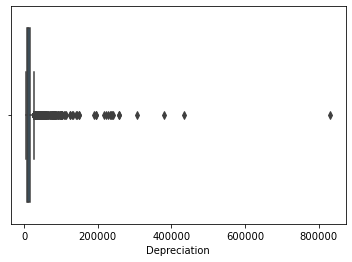

In [10]:
#examine outliers numerical features)
cols=['Depreciation','Engine Capacity', 'Mileage']
sns.boxplot(dataset[cols[0]]);

C:\Users\yangy\anaconda3\envs\pythonEx\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


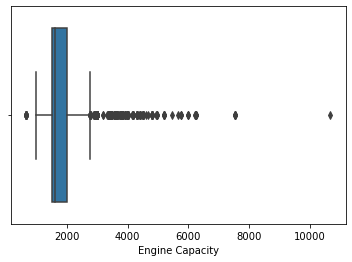

In [11]:
sns.boxplot(dataset[cols[1]]);

C:\Users\yangy\anaconda3\envs\pythonEx\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


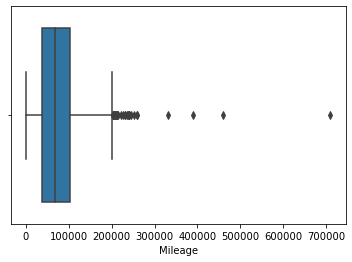

In [12]:
sns.boxplot(dataset[cols[2]]);

In [13]:
 def find_outliers_limit(dataset,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(dataset[col], 25), np.percentile(dataset[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(dataset,col,upper,lower):
    # identify outliers
    outliers = [x for x in dataset[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in dataset[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(dataset[col]>upper,upper,np.where(dataset[col]<lower,lower,dataset[col]))
    return final
outlier_cols=['Depreciation','Engine Capacity','Mileage']
for col in outlier_cols:
    lower,upper=find_outliers_limit(dataset,col)
    dataset[col]=remove_outlier(dataset,col,upper,lower)

Depreciation
--------------------------------------------------
Percentiles: 25th=8800.000, 75th=15510.000, IQR=6710.000
Lower: -1265.0  Upper: 25575.0
Identified outliers: 420
Non-outlier observations: 4480
Engine Capacity
--------------------------------------------------
Percentiles: 25th=1498.000, 75th=1998.000, IQR=500.000
Lower: 748.0  Upper: 2748.0
Identified outliers: 709
Non-outlier observations: 4191
Mileage
--------------------------------------------------
Percentiles: 25th=38000.000, 75th=103807.250, IQR=65807.250
Lower: -60710.875  Upper: 202518.125
Identified outliers: 35
Non-outlier observations: 4865


<AxesSubplot:>

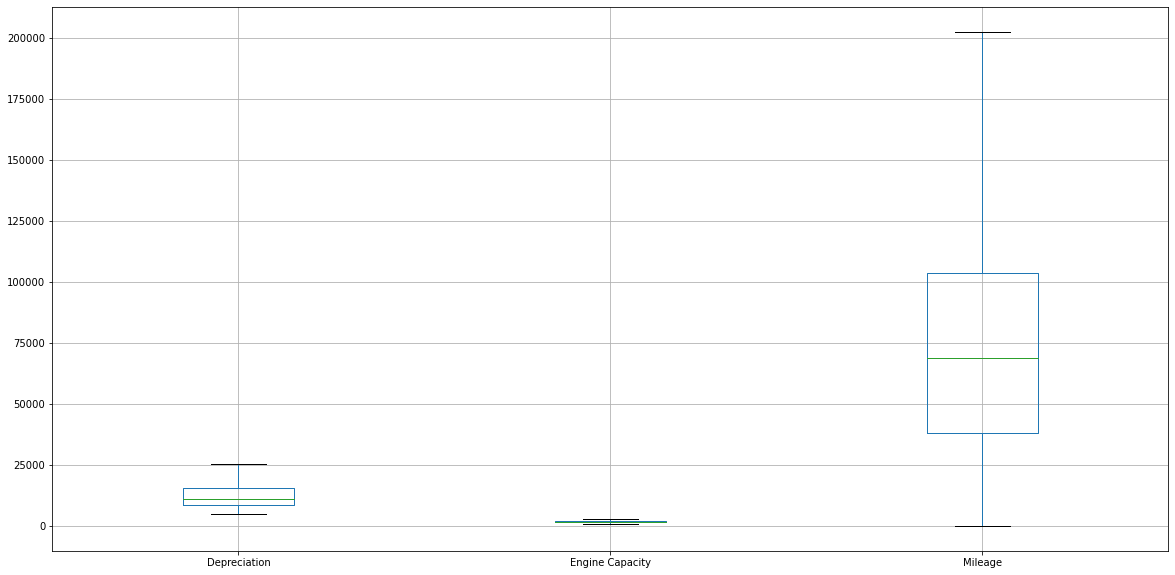

In [14]:
plt.figure(figsize=(20,10))
dataset[outlier_cols].boxplot()

In [15]:
# Mileage and engine capacity is continous variable, spilt into bin 
labels=[0,1,2,3,4,5,6,7,8,9]
dataset['Mileage_bin']=pd.cut(dataset['Mileage'],len(labels),labels=labels)
dataset['Mileage_bin']=dataset['Mileage_bin'].astype(float)
labels=[0,1,2,3,4]
dataset['EC_bin']=pd.cut(dataset['Engine Capacity'],len(labels),labels=labels)
dataset['EC_bin']=dataset['EC_bin'].astype(float)

In [16]:
#use ordinal encoder to handle categorical columns
num_dataset=dataset.select_dtypes(include=np.number)

cat_dataset=dataset.select_dtypes(include=object)

encoding=OrdinalEncoder()

cat_cols=cat_dataset.columns.tolist()

encoding.fit(cat_dataset[cat_cols])

cat_oe=encoding.transform(cat_dataset[cat_cols])

cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)

cat_dataset.reset_index(inplace=True,drop=True)

cat_oe.head()

num_dataset.reset_index(inplace=True,drop=True)

cat_oe.reset_index(inplace=True,drop=True)

final_all_dataset=pd.concat([num_dataset,cat_oe],axis=1)

final_all_dataset


,Ask Price,Depreciation,Mileage,Engine Capacity,Age,Mileage_bin,EC_bin,Brand,Category
0,59000,11870.0,43500.0,1390.0,2259,2.0,1.0,0.0,1.0
1,27800,11010.0,166000.0,1798.0,4556,8.0,2.0,0.0,2.0
2,94800,10870.0,35000.0,999.0,884,1.0,0.0,0.0,2.0
3,99800,14740.0,92999.0,1984.0,1724,4.0,3.0,0.0,5.0
4,74800,10700.0,147000.0,1984.0,4753,7.0,3.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
4895,72800,8970.0,59188.0,999.0,1164,2.0,0.0,15.0,8.0
4896,19000,5420.0,38570.0,1686.0,4200,1.0,2.0,15.0,10.0
4897,49800,8570.0,118000.0,1364.0,1899,5.0,1.0,15.0,1.0
4898,69800,8940.0,35000.0,999.0,1259,1.0,0.0,15.0,8.0


Index(['Ask Price', 'Depreciation', 'Mileage', 'Engine Capacity', 'Age',
       'Mileage_bin', 'EC_bin', 'Brand', 'Category', 'price_log'],
      dtype='object')

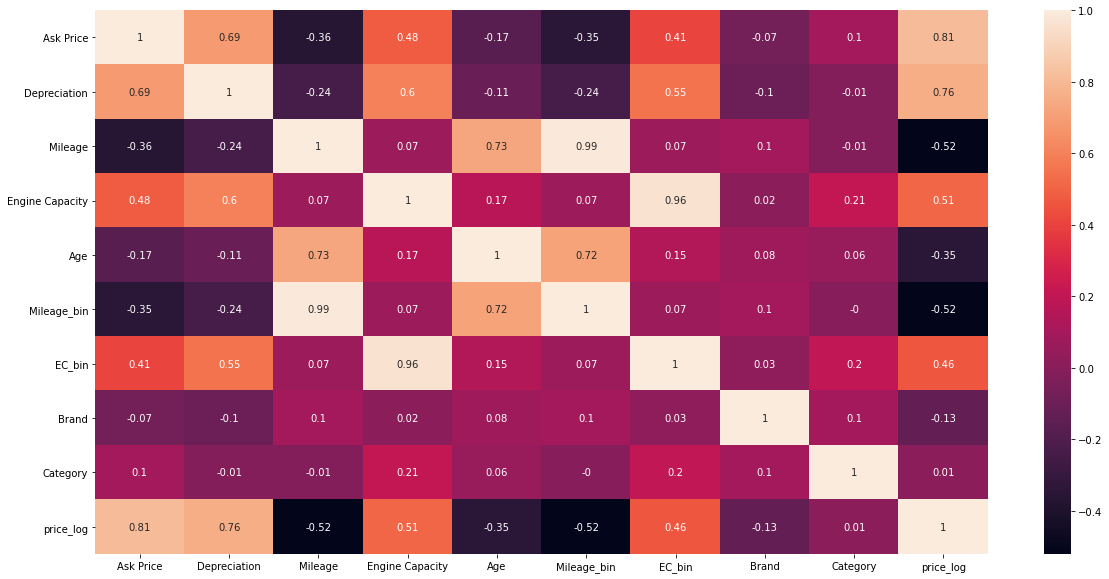

In [17]:
final_all_dataset['price_log']=np.log(final_all_dataset['Ask Price'])
plt.figure(figsize=(20,10))

sns.heatmap(round(final_all_dataset.corr(),2),annot=True);

final_all_dataset.columns


In [18]:
dataset = dataset.sample(frac=1, random_state=0)

In [19]:
#scale data and spilt data 
cols_drop=['Ask Price','price_log']
X=final_all_dataset.drop(cols_drop,axis=1)
y=final_all_dataset['Ask Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled.shape) # x_train and x_test shape should be 2D array
print(y_train.shape)

(3920, 8)
(3920,)


In [20]:
#train the model using 1000 decision trees
model=RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X_train_scaled,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [21]:
# Use the forest's predict method on the test data
y_pred = model.predict(X_test_scaled)


In [22]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4657,133988,133475.345
3539,288800,274504.383
907,898000,737960.442
4353,72800,81231.562
3745,74500,77834.371
...,...,...
3207,68888,71933.474
1539,37800,37869.552
964,77800,80744.688
168,111888,108749.075


In [23]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 10548.73 degrees.
Accuracy: 90.65 %.


In [24]:
# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))